## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler
from itertools import compress

# 忽略警告訊息
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Linear regssion
# Load and return the boston house-prices dataset (regression).

boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['PRICE'] = boston.target
print(df.isnull().sum())
df.describe()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


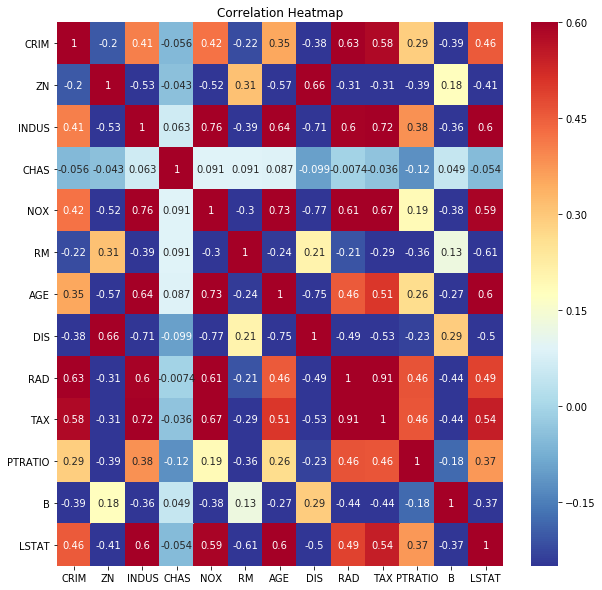

In [3]:
df_Y = df[['PRICE']]
df_X = df.drop(['PRICE'] , axis=1)

plt.figure(figsize = (10, 10))
# 繪製相關係數 (correlations) 的 Heatmap
sns.heatmap(df_X.corr(), cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

In [4]:
MMEncoderX = MinMaxScaler()
MMEncoderY = MinMaxScaler()
MM_df_X = MMEncoderX.fit_transform(df_X)
MM_df_Y = MMEncoderY.fit_transform(df_Y)
L1_Reg = Lasso(alpha=0.0001)
L1_Reg.fit(MM_df_X, MM_df_Y)
L1_Reg.coef_

array([-0.19177799,  0.09521307,  0.        ,  0.06007674, -0.17879767,
        0.44164306,  0.        , -0.34742566,  0.14058001, -0.12746917,
       -0.19585145,  0.08072514, -0.42233595])

In [5]:
L1_mask = list((L1_Reg.coef_>0) | (L1_Reg.coef_<0))
L1_list = list(compress(list(df), list(L1_mask)))
L1_list

['CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [6]:
x_sample = MMEncoderX.fit_transform(df[L1_list])

# 切分訓練集/測試集
# x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=6)
x_train, x_test, y_train, y_test = train_test_split(x_sample, MM_df_Y, test_size=0.25, random_state=6)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

# 可以看回歸模型的參數值
print('Coefficients: ', regr.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

print("R2 Score: %.2f"
      % r2_score(y_test, y_pred))

Coefficients:  [[-0.16520993  0.12688815  0.05338939 -0.16279052  0.37800216 -0.3974953
   0.17709461 -0.18353547 -0.20127909  0.07518116 -0.4722722 ]]
Mean squared error: 0.01
R2 Score: 0.70


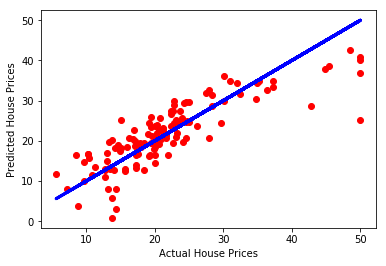

In [7]:
# 畫出回歸模型與實際資料的分佈
y_test = MMEncoderY.inverse_transform(y_test)
y_pred = MMEncoderY.inverse_transform(y_pred)

plt.scatter(y_test, y_pred, color='red')
plt.plot(y_test, y_test, color='blue', linewidth=3)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.show()

In [8]:
# Logistics regression
# Load and return the wine dataset (classification).
wine = datasets.load_wine()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=8)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9111111111111111


In [9]:
# Logistics regression
# Load and return the breast cancer wisconsin dataset (classification).
breast_cancer = datasets.load_breast_cancer()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=3)

# 建立模型
logreg = linear_model.LogisticRegression()

# 訓練模型
logreg.fit(x_train, y_train)

# 預測測試集
y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9370629370629371
